# Used Car Sales 

https://s3.amazonaws.com/talent-assets.datacamp.com/DS+Case+Study+-+Used+Car+Sales+-+Prework.pdf

| Column Name   | Details                                                                                                      |
|---------------|--------------------------------------------------------------------------------------------------------------|
| model         | Character, the model of the car, 18 possible values                                                          |
| year          | Numeric, year of registration from 1998 to 2020                                                              |
| price         | Numeric, listed value of the car in GBP                                                                      |
| transmission  | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"                                              |
| mileage       | Numeric, listed mileage of the car at time of sale                                                           |
| fuelType      | Character, one of "Petrol", "Hybrid", "Diesel" or "Other"                                                    |
| tax           | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car |
| mpg           | Numeric, miles per gallon as reported by manufacturer                                                        |
| engineSize    | Numeric, listed engine size, one of 16 possible values                                                       |

# 1. Context
They want us to predict prices within 10% of the listed price. 
But as their team can only manage 30%, it is probably ok to show we are at least as good as that. 
I don’t know how close you will get in the time we have, but do your best and present whatever you find. 
You can find more details about what I expect you to do in the “Guide to Data Science Projects”, included below. 
And information on the data in the section “Data Information”.

Next month our most experienced sales team member will be retiring. They have been on the team almost since the company was founded. They are incredibly talented at estimating the sales price of cars. We are quite worried that when they retire we won’t be able to estimate as well and that will have a huge impact on sales.
Currently, when a new car comes in, team members take all of the information that usually appears in the advert and give it to this team member. They then estimate the price. We have been testing the team members estimating themselves but they are always around 30% away from the price we know the car will sell for.
Can you help us estimate the price we should list a car for? The team estimates are always around 30% off, we really want to be within 10% of the price. This will mean we can automate the whole process and be able to sell cars quicker.
As I said, the team member retires in a month, so we would like to get your initial thoughts as soon as possible. We would like to see a presentation, you will be presenting to me and another sales manager. We would like to hear about whatever you manage to achieve to help us make decisions on the way forward.



# 2. Bussines Goal 

The goal here is to be able to predict second hand car prices after the departure of this highly skilled team member.

We have a dataset with prices and explanatory features. Lets try to build a price estimator using regression.

# 3. Initial Exploration - Data Validation

Nulls, duplicates, and features distributions.

- 6738 entries
- No null values
- The text features ('model', 'transmission' and 'fuelType') will be converted into unordered categories
- The model values from the toyota dataset have a preffixing blank space.
- There is a single 'other' value in the transmission feature. Based on the car model, year and fuelType, it seems an encoding error. We will update the 'other' with 'automatic' 
- Mileage, mpg and price are highly skewed
- Tax and engineSize would require further attention

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv('toyota.csv')
# Model categories created using ChatGPT
cats = pd.read_csv('toyota_model_categories.csv')

print(df.info())
print(cats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     18 non-null     object
 1   category  18 non-null     object
dtypes: object(2)
memory usage: 420.0+ bytes
None


In [2]:
print(cats.model.unique())
print(df.model.unique())

['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE VERSO' 'Land Cruiser' 'Supra' 'Camry' 'Verso-S'
 'IQ' 'Urban Cruiser']
[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


In [3]:
for col in df.select_dtypes(include='object').columns: 
    df[col] = df[col].str.strip().str.lower()

for col in cats.select_dtypes(include='object').columns: 
    cats[col] = cats[col].str.strip().str.lower()

In [4]:
df = pd.merge(df, cats, on='model')

## Non numerical variables

### Model

In [5]:
len(df.model.value_counts())

18

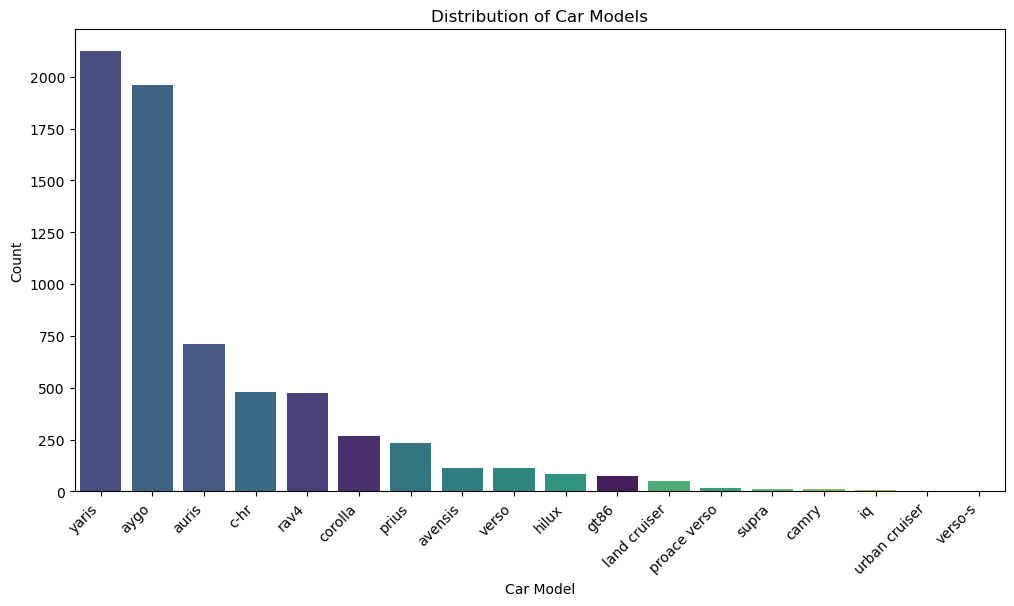

In [6]:
plt.figure(figsize=(12, 6))
order = df['model'].value_counts().index  
sns.countplot(data=df, x='model', hue='model', order=order, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.title("Distribution of Car Models")
plt.show()

### Car Category

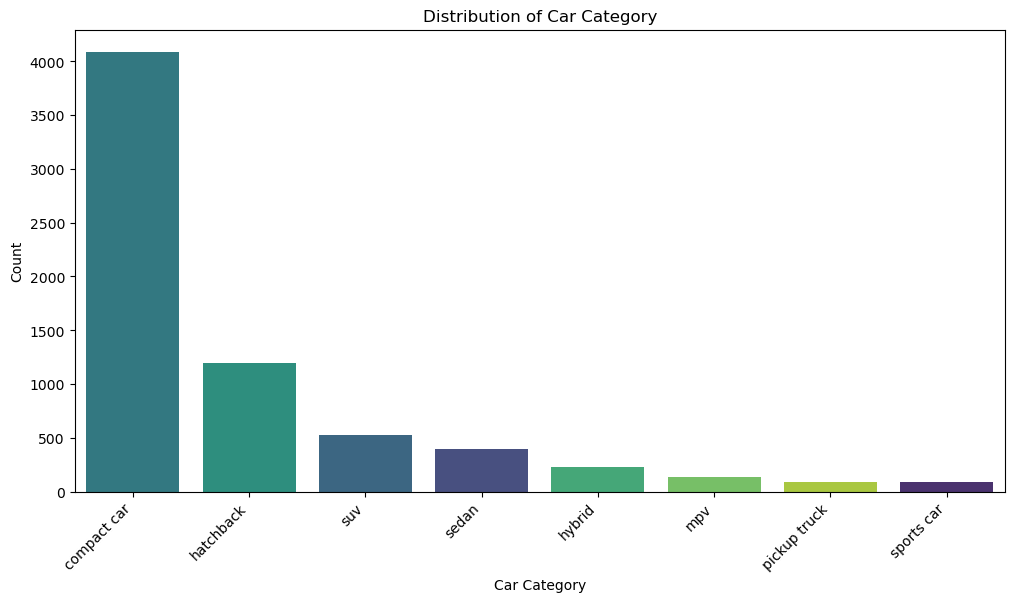

In [7]:
plt.figure(figsize=(12, 6))
order = df['category'].value_counts().index  
sns.countplot(data=df, x='category', hue='category', order=order, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Car Category")
plt.ylabel("Count")
plt.title("Distribution of Car Category")
plt.show()

In [8]:
df.transmission.value_counts()

transmission
manual       3826
automatic    2657
semi-auto     254
other           1
Name: count, dtype: int64

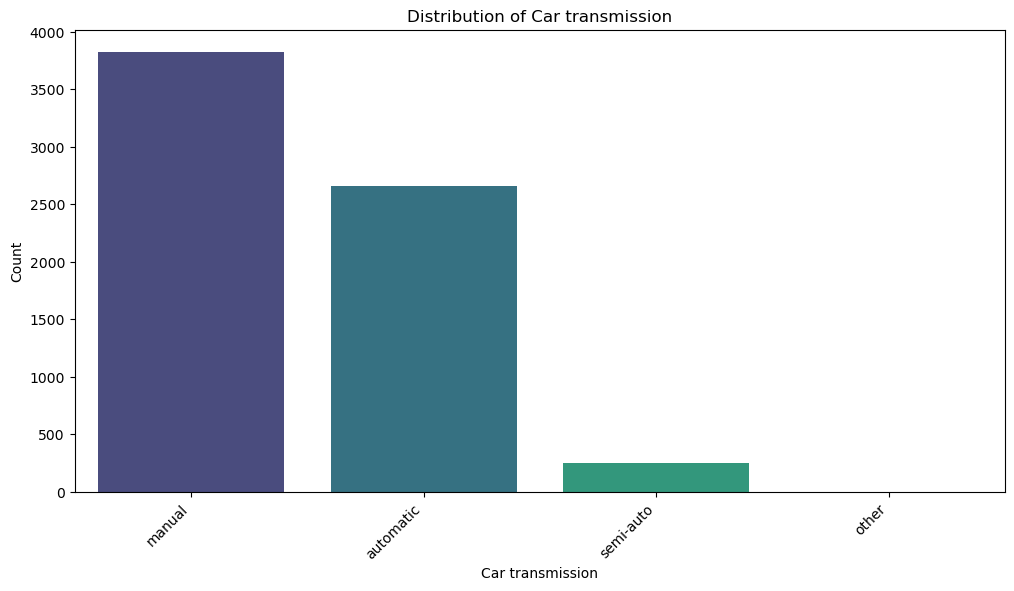

In [9]:
plt.figure(figsize=(12, 6))
order = df['transmission'].value_counts().index  
sns.countplot(data=df, x='transmission', hue='transmission', order=order, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Car transmission")
plt.ylabel("Count")
plt.title("Distribution of Car transmission")
plt.show()

In [10]:
df[df['transmission'] == 'other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,category
2458,yaris,2015,12795,other,16733,hybrid,0,78.0,1.5,compact car


In [11]:
pd.set_option('display.max_rows', None)
df[(df['model'] == 'yaris') & (df['year'] == 2015) & (df['fuelType'] == 'hybrid')].transmission.value_counts()

transmission
automatic    73
other         1
Name: count, dtype: int64

In [12]:
df.loc[df['transmission'] == 'other', 'transmission']='automatic'

In [13]:
df.fuelType.value_counts()

fuelType
petrol    4087
hybrid    2043
diesel     503
other      105
Name: count, dtype: int64

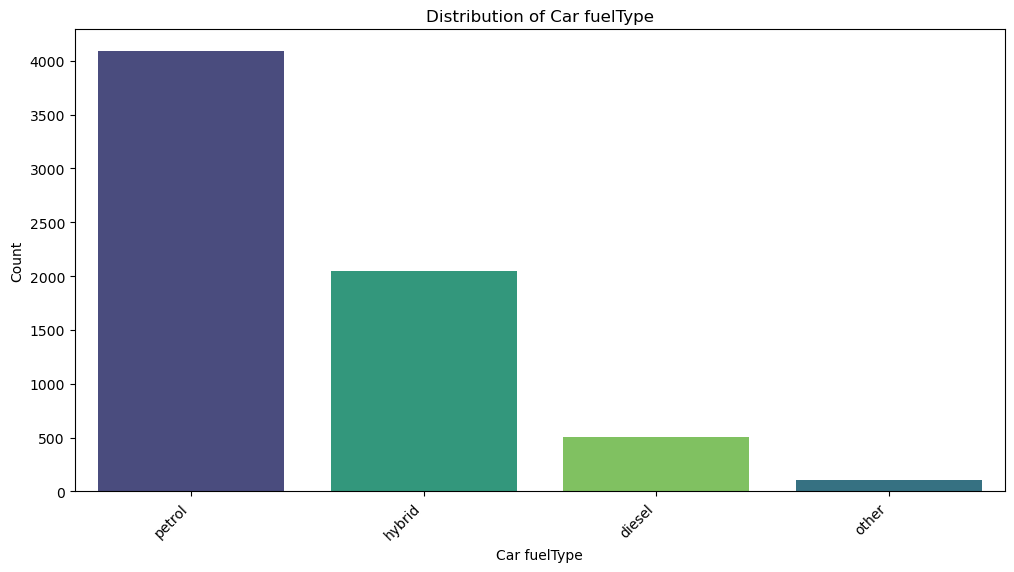

In [14]:
plt.figure(figsize=(12, 6))
order = df['fuelType'].value_counts().index  
sns.countplot(data=df, x='fuelType', hue='fuelType', order=order, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Car fuelType")
plt.ylabel("Count")
plt.title("Distribution of Car fuelType")
plt.show()

In [15]:
# Lets convert the literal features into categories.
cat_cols = ['model', 'transmission', 'fuelType', 'category']
for col in cat_cols:
    df[col] = df[col].astype('category')

## Numeric features

In [16]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


The data seems to match with whats given in the data dictionary in terms of categories

### Year

Year is left-swewed with a lot of outliers but all the values seem to be right.

<Figure size 1400x600 with 0 Axes>

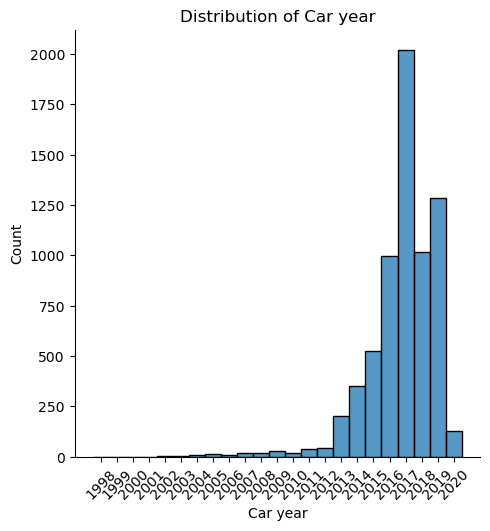

In [17]:
plt.figure(figsize=(14, 6))
sns.displot(data=df, x='year', discrete=True)
plt.xticks(sorted(set(df.year)), rotation=45)  
plt.xlabel("Car year")
plt.ylabel("Count")
plt.title("Distribution of Car year")
plt.show()

### Price

Price is right-swewed with a lot of outliers but all the values seem to be right.

<Figure size 1400x600 with 0 Axes>

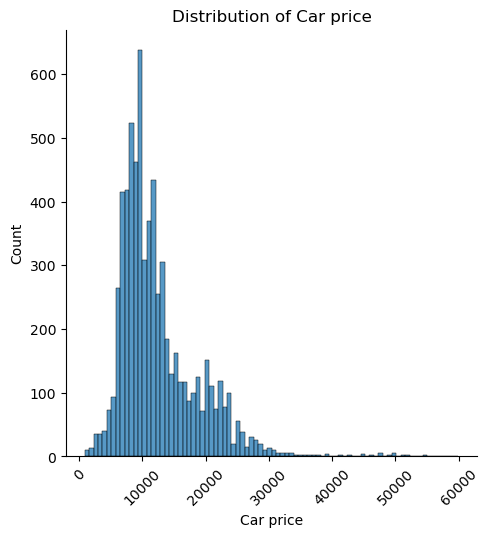

In [18]:
plt.figure(figsize=(14, 6))
sns.displot(data=df, x='price', discrete=False)
plt.xticks(rotation=45)  
plt.xlabel("Car price")
plt.ylabel("Count")
plt.title("Distribution of Car price")
plt.show()

In [19]:
df[df['price']>55000]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,category
6711,supra,2019,59995,automatic,9909,other,150,34.5,3.0,sports car


<Axes: xlabel='price'>

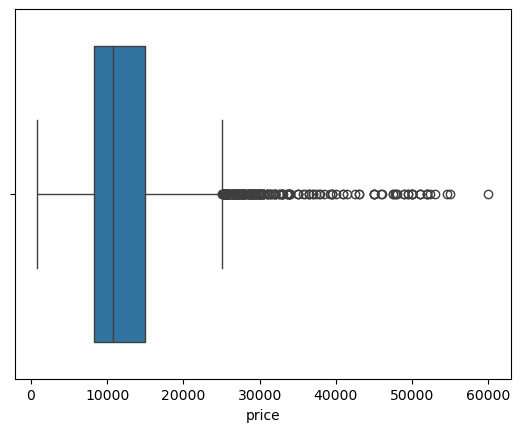

In [20]:
sns.boxplot(data=df, x='price')

<Axes: xlabel='price'>

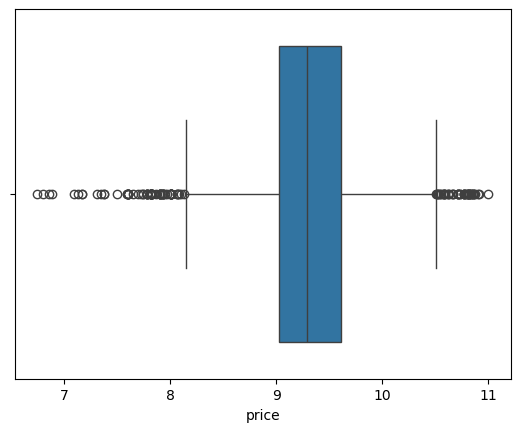

In [21]:
sns.boxplot(x=np.log(df.price))

### Mileage 

Higly right skewed. Yet, all the values are legit.

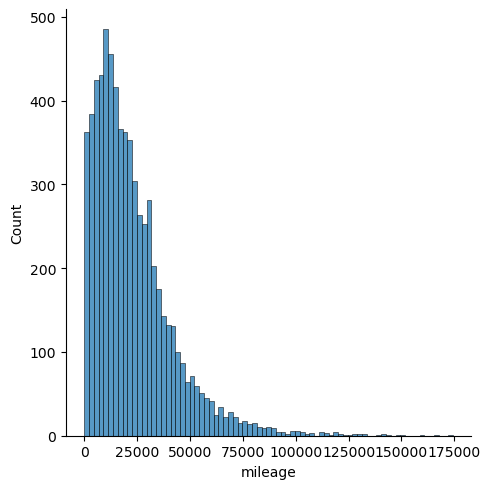

In [22]:
sns.displot(data=df, x='mileage')

<Axes: xlabel='mileage'>

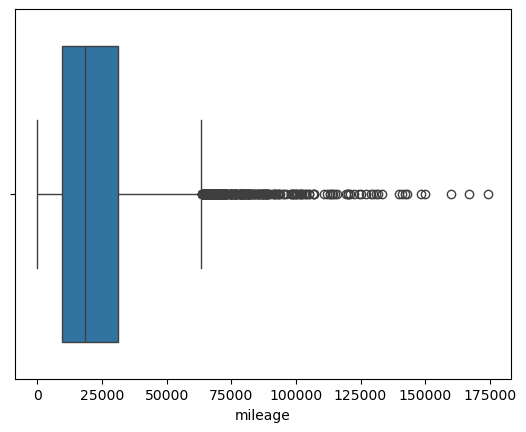

In [23]:
sns.boxplot(x=df.mileage)

<Axes: xlabel='mileage'>

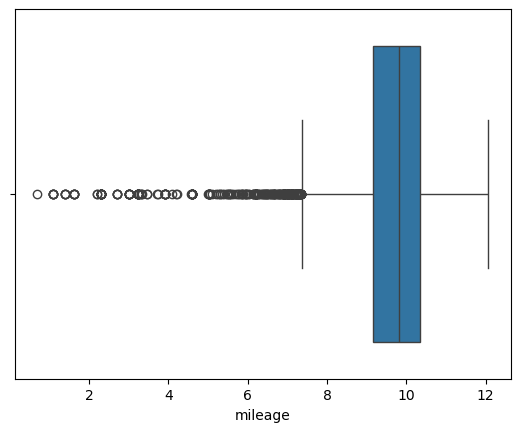

In [24]:
sns.boxplot(x=np.log(df.mileage))

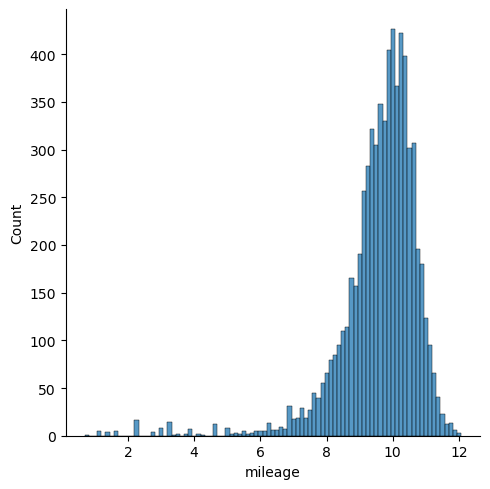

In [25]:
sns.displot(x=np.log(df.mileage))

### Tax

The distribution of the tax variable indicates that not every single value is a valid value. There are several modes. 

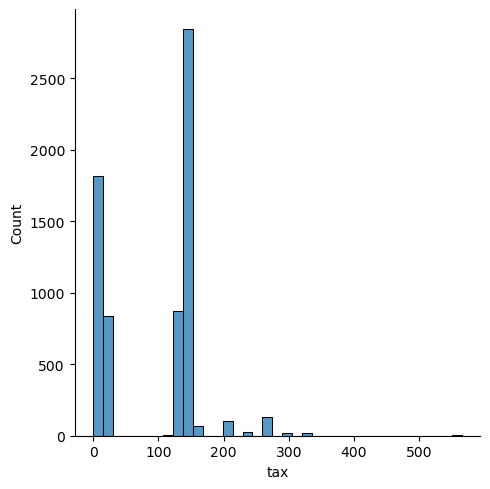

In [26]:
sns.displot(data=df, x='tax')

In [27]:
df[df['tax']>500]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,category
6686,land cruiser,2008,6950,automatic,174419,diesel,565,31.4,3.0,suv
6696,land cruiser,2006,7240,automatic,113000,diesel,555,31.4,3.0,suv
6698,land cruiser,2014,44990,automatic,60000,diesel,540,29.7,4.5,suv


### Mpg

The distribution of the mpg variable indicates that not every single value is a valid value. There are several modes. 

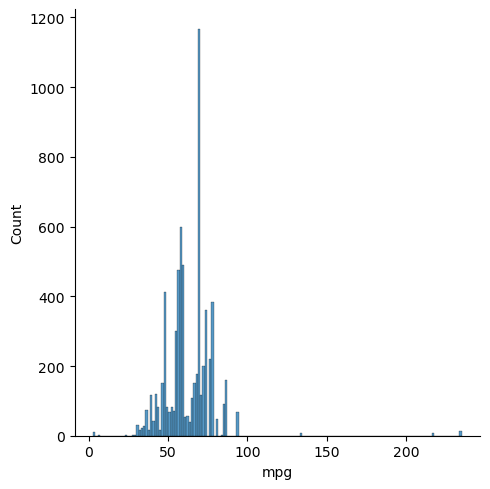

In [28]:
sns.displot(data=df, x='mpg')

In [29]:
df[df['mpg']>200]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,category
6098,prius,2017,20795,automatic,3881,hybrid,135,235.0,1.8,hybrid
6103,prius,2018,20495,automatic,16347,hybrid,140,235.0,1.8,hybrid
6116,prius,2017,19998,automatic,13476,hybrid,140,235.0,1.8,hybrid
6118,prius,2019,24987,automatic,6552,hybrid,135,235.0,1.8,hybrid
6124,prius,2020,27990,automatic,1500,hybrid,135,235.0,1.8,hybrid
6134,prius,2017,20998,automatic,17681,hybrid,135,235.0,1.8,hybrid
6151,prius,2019,27999,automatic,3650,hybrid,140,217.3,1.8,hybrid
6176,prius,2019,26995,automatic,12998,hybrid,135,217.3,1.8,hybrid
6198,prius,2019,29995,automatic,3754,hybrid,135,217.3,1.8,hybrid
6200,prius,2018,19072,automatic,43584,hybrid,135,235.0,1.8,hybrid


<Axes: ylabel='mpg'>

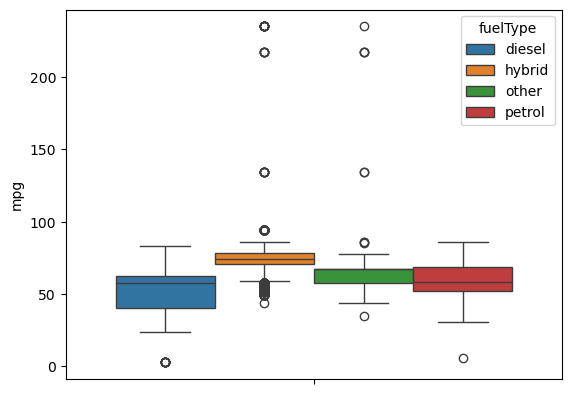

In [30]:
sns.boxplot(data=df, hue='fuelType', y='mpg')

<Axes: ylabel='mileage'>

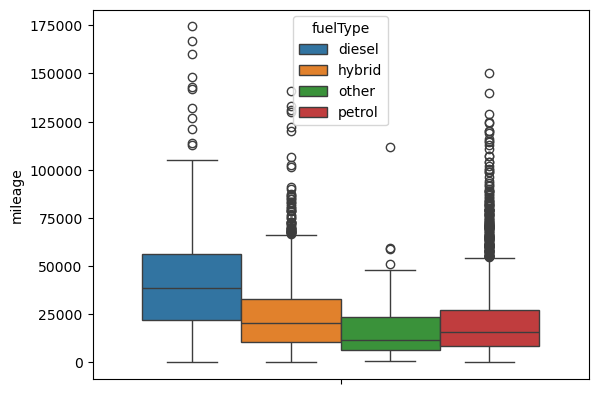

In [31]:
sns.boxplot(data=df, hue='fuelType', y='mileage')

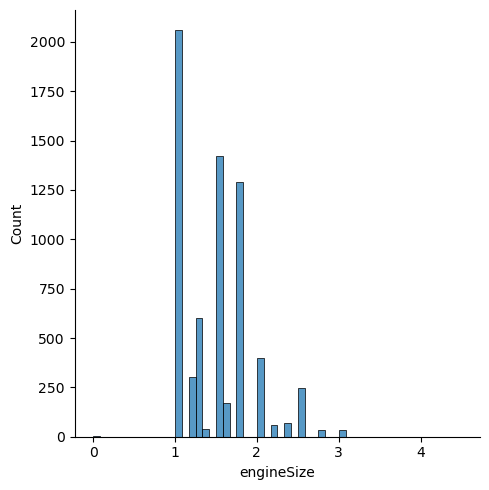

In [32]:
sns.displot(data=df, x='engineSize')

## Duplicates


In [33]:
df[df.duplicated(subset=df.columns, keep='first')].sort_values(by='model')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,category
3230,auris,2013,6622,manual,41959,petrol,145,47.9,1.6,hatchback
3177,auris,2016,8992,manual,40323,diesel,20,67.3,1.6,hatchback
2945,auris,2016,9985,manual,27600,petrol,30,58.9,1.2,hatchback
6357,avensis,2017,10595,manual,35939,diesel,145,67.3,1.6,sedan
3948,aygo,2019,9295,manual,5000,petrol,145,57.7,1.0,compact car
4284,aygo,2019,9995,manual,25,petrol,145,56.5,1.0,compact car
4283,aygo,2019,9995,manual,25,petrol,145,56.5,1.0,compact car
4059,aygo,2019,8495,manual,5519,petrol,145,56.5,1.0,compact car
3902,aygo,2019,10000,manual,1000,petrol,145,57.7,1.0,compact car
3836,aygo,2016,8450,manual,12935,petrol,0,69.0,1.0,compact car


In [34]:
df.duplicated(subset=df.columns, keep='first').sum()

39

Taking into account every single feature value to find duplicates, there seems to be 39.
We are going to proceed to drop them, since they seem real duplicates.

In [35]:
df = df.drop_duplicates(subset=df.columns, keep='first')

In [36]:
df.shape

(6699, 10)

# 4. Exploratory Data Analysis 

- Estadísticas descriptivas y visualización de datos.
- Identificación de relaciones entre variables.
- Detección de sesgos, patrones y problemas de calidad.



In [37]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [38]:
df.loc[:,'log_price'] = np.log(df.price)

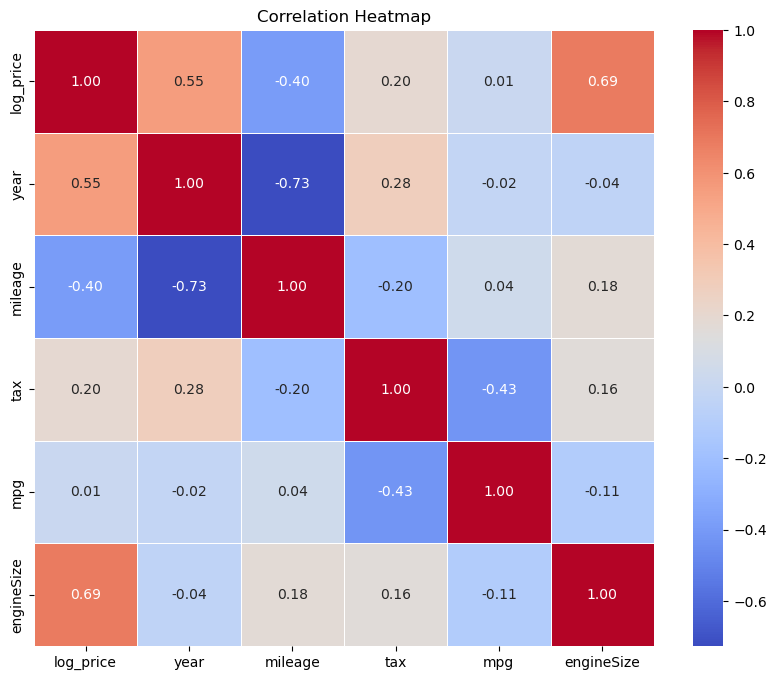

In [39]:
correlation_matrix = df[['log_price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

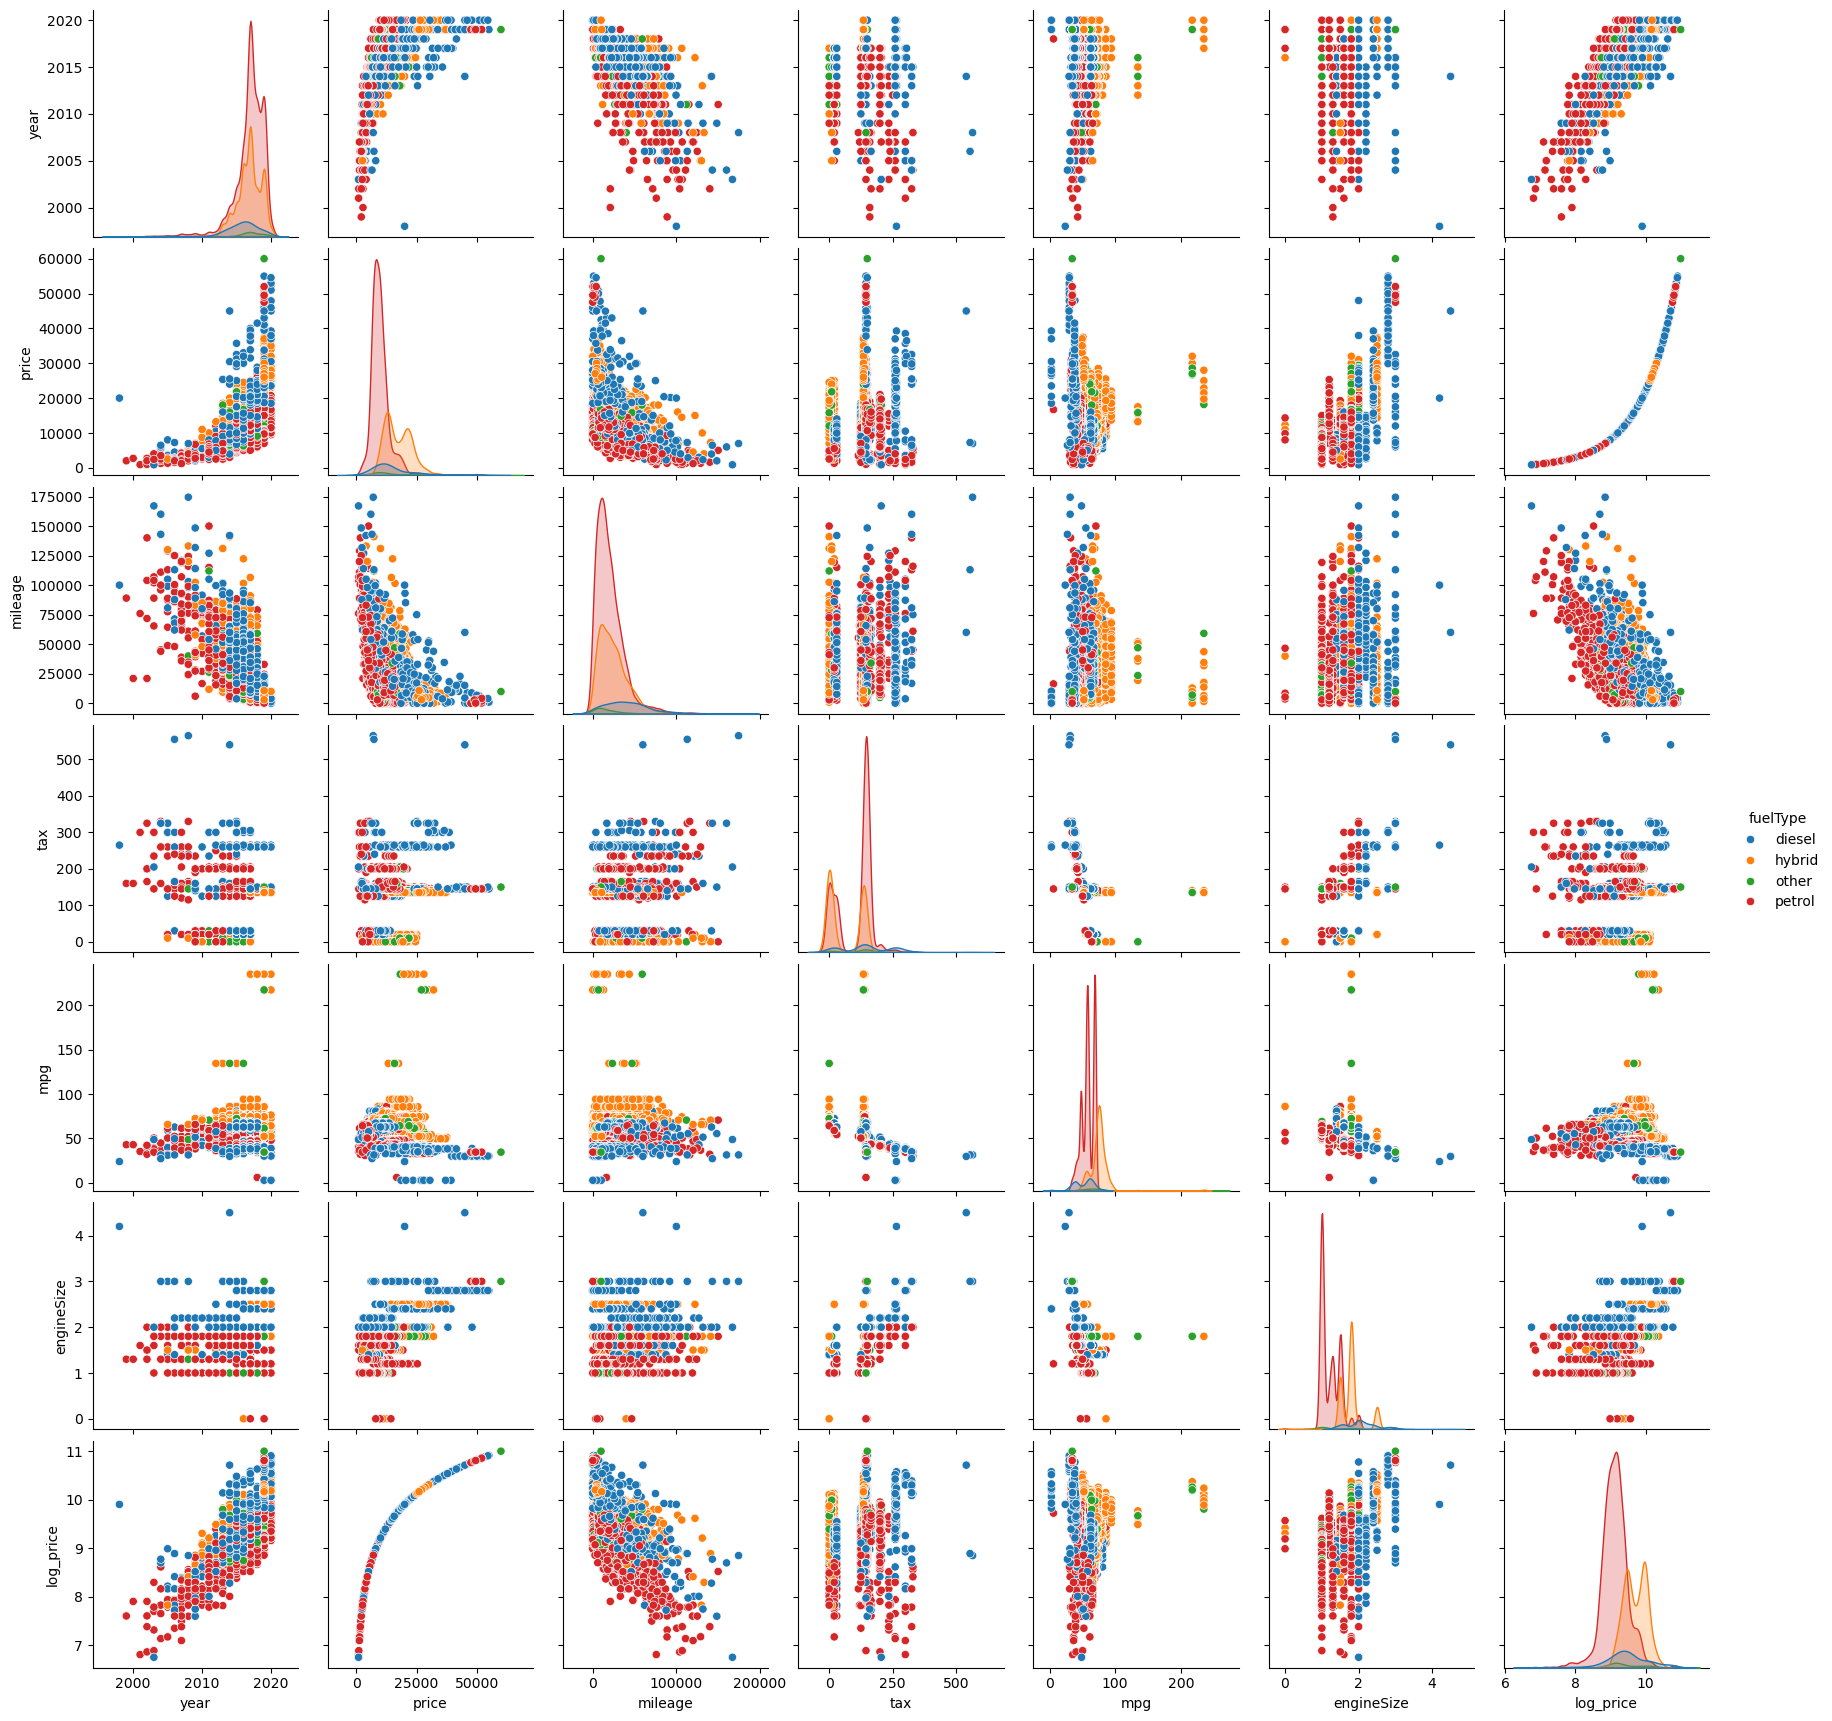

In [40]:
sns.pairplot(data=df, hue='fuelType')

The relationship between log_price and year, mileage and engineSize is more linear than the one with price. Lets drop price

In [41]:
df = df.drop('price', axis=1)

### Log_price VS model

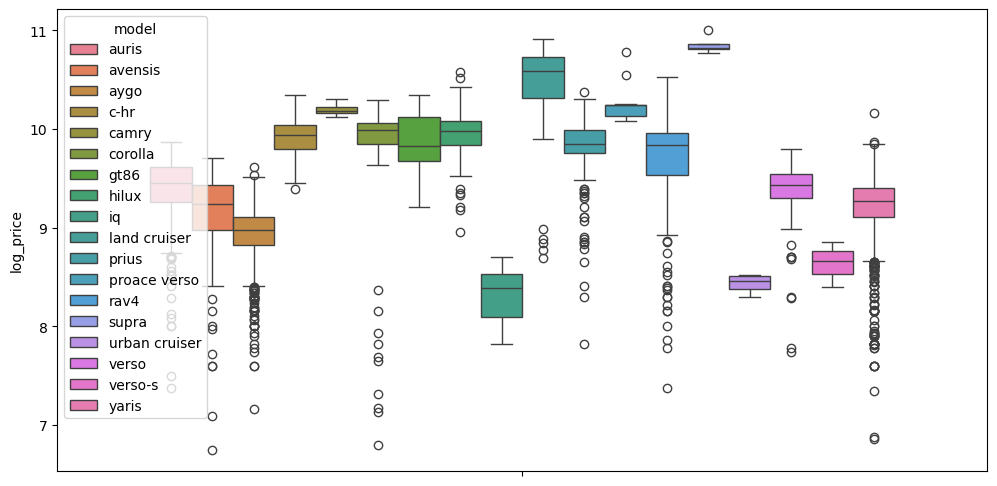

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='model', y='log_price')
plt.xticks(rotation=45)
plt.show()

### Log_price VS category

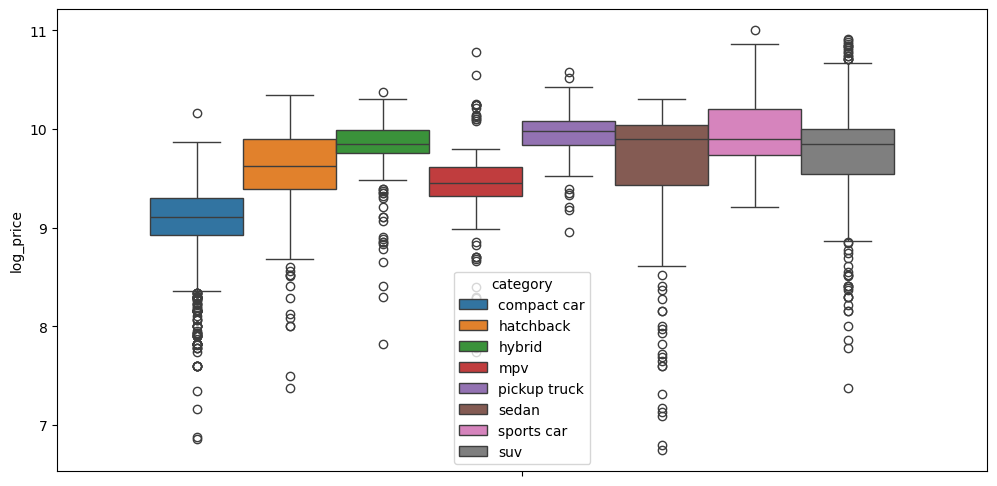

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='category', y='log_price')
plt.xticks(rotation=45)
plt.show()

### Log_price VS transmission

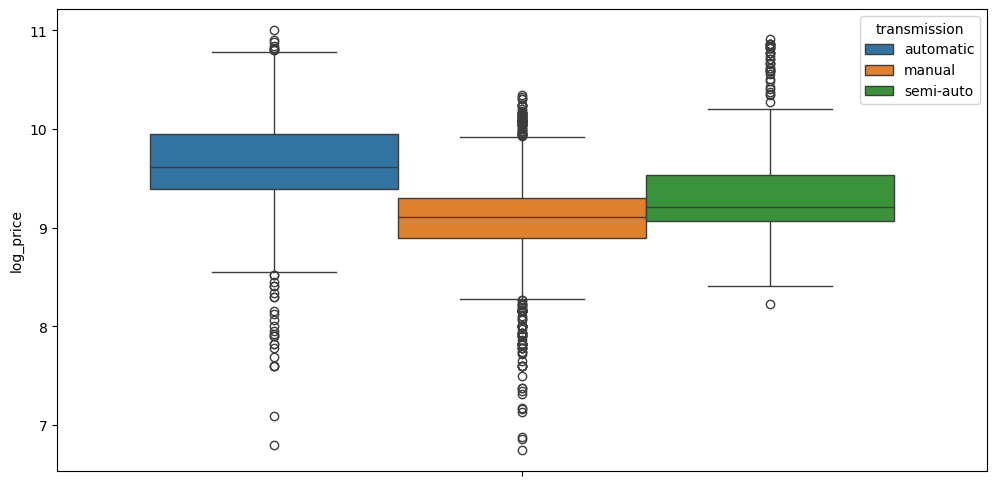

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='transmission', y='log_price')
plt.xticks(rotation=45)
plt.show()

### Log_price VS fuelType

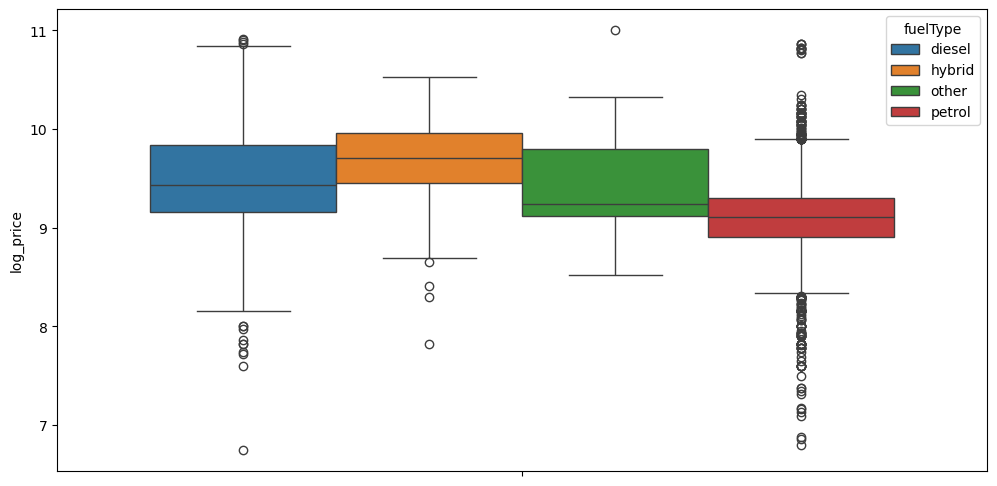

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='fuelType', y='log_price')
plt.xticks(rotation=45)
plt.show()

### Log_price VS year

<Axes: xlabel='year', ylabel='log_price'>

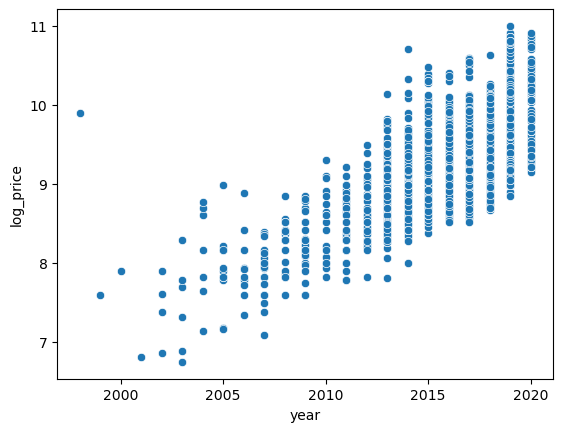

In [46]:
sns.scatterplot(data=df, x='year', y='log_price')

### Log_price VS mpg

<Axes: xlabel='mpg', ylabel='log_price'>

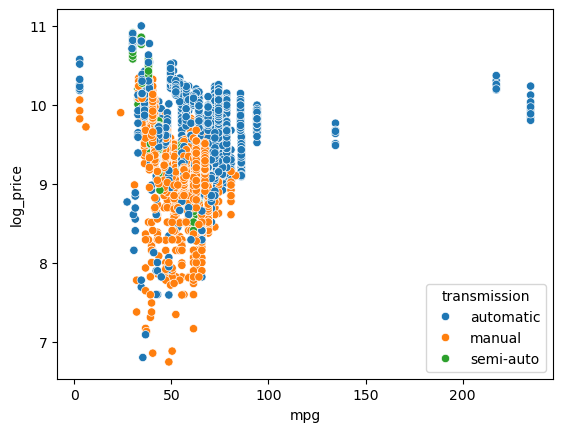

In [47]:
sns.scatterplot(data=df, x='mpg', y='log_price', hue='transmission')

### Log_price vs Mileage

<Axes: xlabel='mileage', ylabel='log_price'>

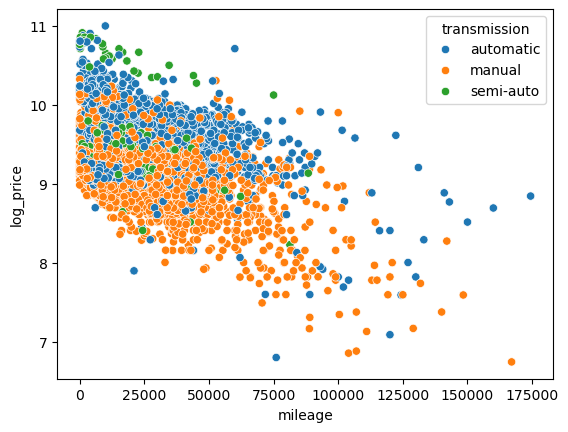

In [48]:
sns.scatterplot(data=df, x='mileage', y='log_price', hue='transmission')

In [49]:
df.loc[:,'sqrt_mileage'] = np.sqrt(df['mileage'])

<Axes: xlabel='sqrt_mileage', ylabel='log_price'>

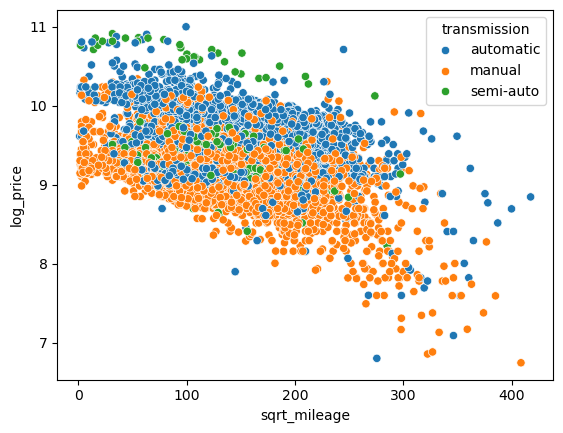

In [50]:
sns.scatterplot(data=df, x='sqrt_mileage', y='log_price', hue='transmission')

### Log_price vs tax

<Axes: xlabel='tax', ylabel='log_price'>

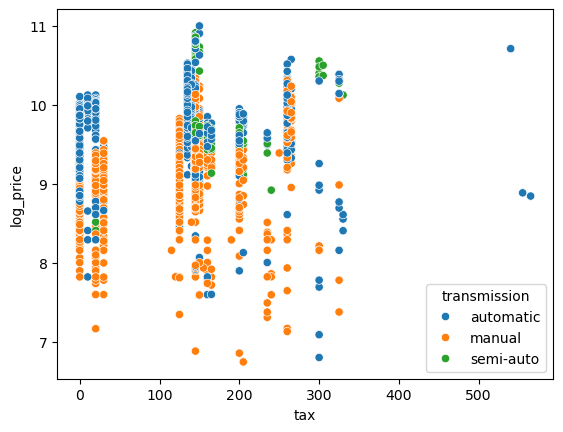

In [51]:
sns.scatterplot(data=df, x='tax', y='log_price', hue='transmission')

# 4. Preprocesamiento y feature engineering
	•	Codificación de variables categóricas.
	•	Normalización o estandarización de variables numéricas.
	•	Creación de nuevas features si aporta valor.
	•	Selección de características relevantes.

- Crear buckets para tax
- Estandarizar features (engine size y mileage tienen unidades muy dispares)
- LabelEncoding

In [52]:
features_to_keep = ['model', 'year', 'transmission', 'fuelType', 'tax', 
       'engineSize', 'category', 'log_price', 'sqrt_mileage']
df = df[features_to_keep]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6699 non-null   category
 1   year          6699 non-null   int64   
 2   transmission  6699 non-null   category
 3   fuelType      6699 non-null   category
 4   tax           6699 non-null   int64   
 5   engineSize    6699 non-null   float64 
 6   category      6699 non-null   category
 7   log_price     6699 non-null   float64 
 8   sqrt_mileage  6699 non-null   float64 
dtypes: category(4), float64(3), int64(2)
memory usage: 341.6 KB


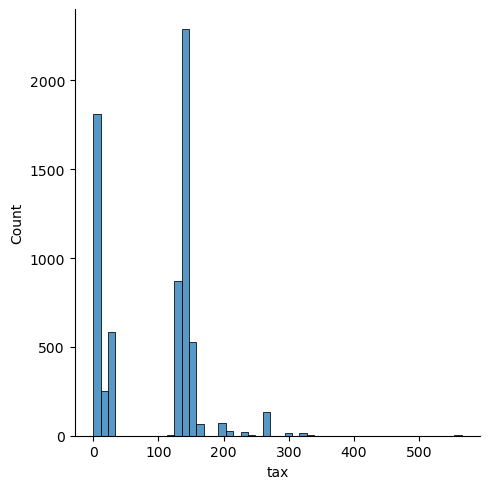

In [54]:
sns.displot(data=df, x='tax', bins=50)
plt.show()

In [55]:
df.tax.value_counts()

tax
145    2065
0      1787
135     678
30      585
150     527
20      250
140     223
125     193
260      92
200      74
265      41
160      41
205      28
165      23
10       23
235      21
300      16
325      13
240       5
330       4
305       2
250       1
120       1
155       1
115       1
190       1
565       1
555       1
540       1
Name: count, dtype: int64

In [56]:
df['binned_tax'] = pd.cut(df['tax'], bins=5, labels=False)

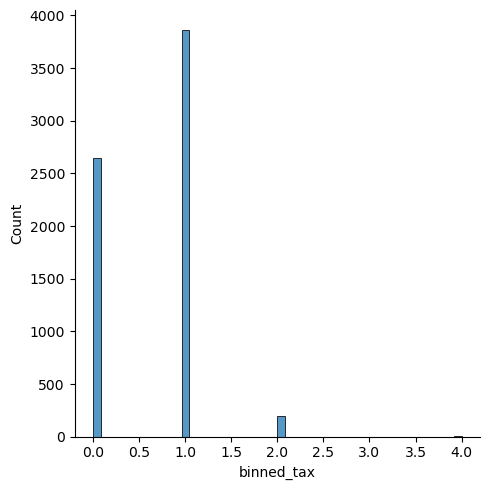

In [57]:
sns.displot(data=df, x='binned_tax', bins=50)
plt.show()

<Axes: xlabel='binned_tax', ylabel='log_price'>

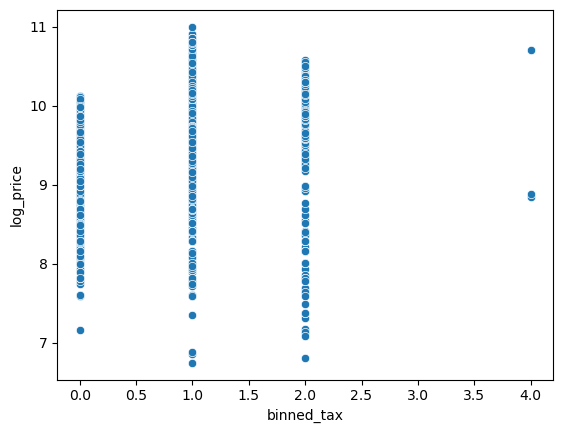

In [58]:
sns.scatterplot(data=df, x='binned_tax', y='log_price')

<Axes: ylabel='log_price'>

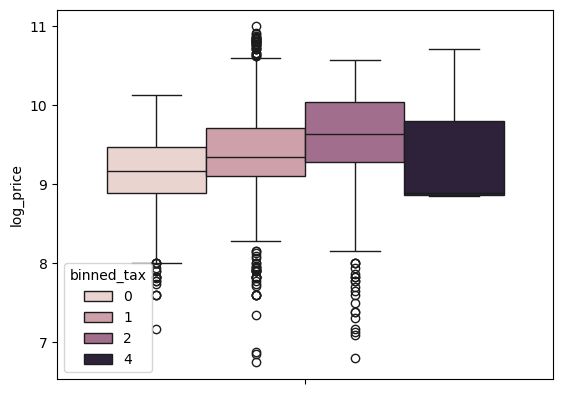

In [59]:
sns.boxplot(data=df, y='log_price', hue='binned_tax')

In [60]:
df[['log_price', 'binned_tax', 'tax']].corr()

,log_price,binned_tax,tax
log_price,1.000000,0.217372,0.195674
binned_tax,0.217372,1.000000,0.985177
tax,0.195674,0.985177,1.000000


In [61]:
df = df.drop('tax', axis=1)

In [62]:
df.columns

Index(['model', 'year', 'transmission', 'fuelType', 'engineSize', 'category',
       'log_price', 'sqrt_mileage', 'binned_tax'],
      dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['year', 'engineSize', 'sqrt_mileage', 'binned_tax']
scaler = StandardScaler() 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [64]:
columns_to_encode = ['category', 'fuelType', 'transmission', 'model']
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df.head()

,year,engineSize,log_price,sqrt_mileage,binned_tax,category_hatchback,category_hybrid,category_mpv,category_pickup truck,category_sedan,...,model_iq,model_land cruiser,model_prius,model_proace verso,model_rav4,model_supra,model_urban cruiser,model_verso,model_verso-s,model_yaris
0,-0.336853,1.212155,9.680344,0.272505,2.511183,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.116640,1.212155,9.680031,-0.039317,0.670656,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.790346,1.212155,9.546670,0.447466,2.511183,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.116640,1.212155,9.852089,-0.289261,0.670656,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.116640,1.212155,9.769842,0.858574,0.670656,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 5. División del dataset
	•	Separar en conjuntos de entrenamiento, validación y prueba.
	•	Estrategia de partición adecuada (por ejemplo, estratificación si es necesario).

In [65]:
df.columns

Index(['year', 'engineSize', 'log_price', 'sqrt_mileage', 'binned_tax',
       'category_hatchback', 'category_hybrid', 'category_mpv',
       'category_pickup truck', 'category_sedan', 'category_sports car',
       'category_suv', 'fuelType_hybrid', 'fuelType_other', 'fuelType_petrol',
       'transmission_manual', 'transmission_semi-auto', 'model_avensis',
       'model_aygo', 'model_c-hr', 'model_camry', 'model_corolla',
       'model_gt86', 'model_hilux', 'model_iq', 'model_land cruiser',
       'model_prius', 'model_proace verso', 'model_rav4', 'model_supra',
       'model_urban cruiser', 'model_verso', 'model_verso-s', 'model_yaris'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split 

y = df['log_price']
X = df.drop('log_price', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [67]:
type(X_train)

pandas.core.frame.DataFrame

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

import numpy as np

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Convertir de nuevo a la escala original para calcular RMSE
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

# Resultados
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")

Train R²: 0.9515, Test R²: 0.9350
Train RMSE: 1388.7189, Test RMSE: 1461.9426


/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_87344/3395871758.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coef_df, palette="Blues_r")


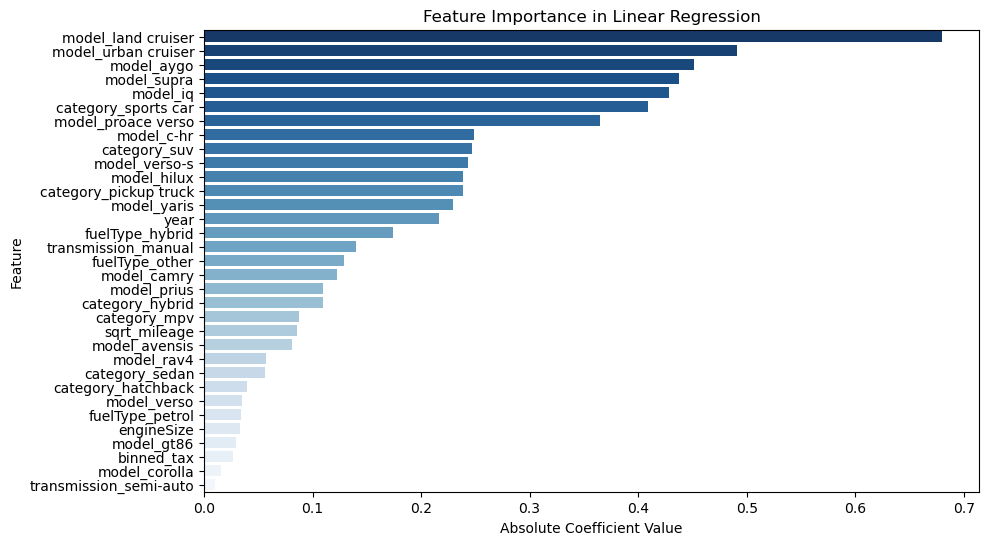

In [69]:
# Get feature names (assuming they were used during training)
feature_names = X.columns  # Replace X with the actual dataframe used for training

# Extract absolute coefficient values
coefficients = np.abs(model.coef_)

# Create a DataFrame for visualization
coef_df = pd.DataFrame({"Feature": feature_names, "Importance": coefficients})

# Sort by importance
coef_df = coef_df.sort_values(by="Importance", ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=coef_df, palette="Blues_r")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [70]:
y_pred = model.predict(X_test)
residuales = np.exp(y_test) - np.exp(y_pred)

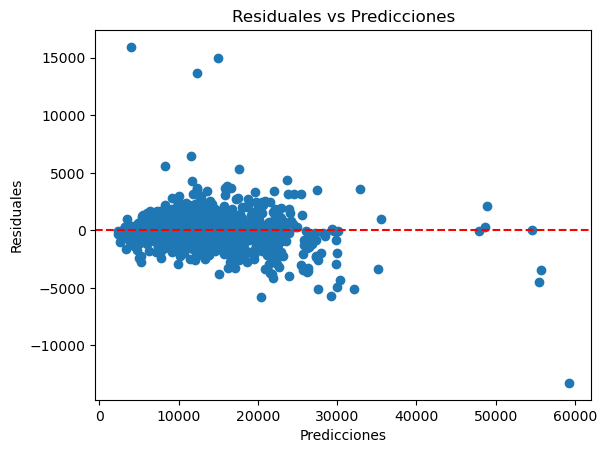

In [71]:
plt.scatter(np.exp(y_pred), residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.title('Residuales vs Predicciones')
plt.show()

In [72]:
errors=pd.DataFrame({'price_original': np.exp(y_test),
                    'price_prediction': np.exp(y_pred),
                    'residual': residuales})

In [73]:
errors.loc[:,'percentage_off'] = np.abs(errors['residual']/errors['price_original'])

In [74]:
errors.head()

,price_original,price_prediction,residual,percentage_off
2133,10800.0,10463.728724,336.271276,0.031136
3883,8250.0,7785.383798,464.616202,0.056317
855,12995.0,14631.816997,-1636.816997,0.125957
5550,7880.0,7305.826601,574.173399,0.072865
4470,6295.0,6614.505050,-319.505050,0.050755


In [75]:
print(f'The amount of predictions with an error of <= 10% is {len(errors[np.abs(errors["percentage_off"]<=0.1)])}')

The amount of predictions with an error of <= 10% is 962


In [76]:
(np.abs(errors['percentage_off'])<=0.1).sum()/(len(errors))

0.7179104477611941

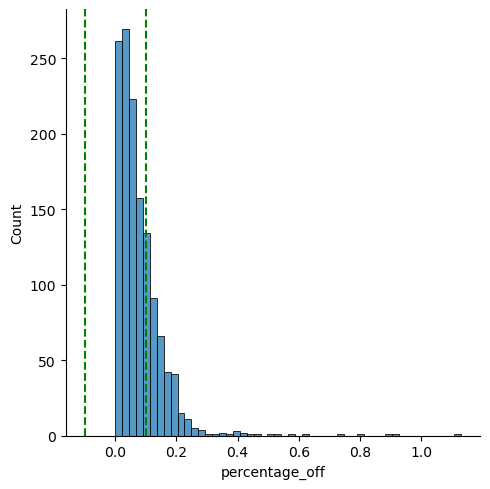

In [77]:
sns.displot(data=errors, x='percentage_off', bins=50)
plt.axvline(x=0.1, color='g', linestyle='--', label='x = 0.1')
plt.axvline(x=-0.1, color='g', linestyle='--', label='x = -0.1')


# 6. Selección y entrenamiento del modelo
	•	Probar varios modelos (árboles, regresión, redes neuronales, etc.).
	•	Ajuste de hiperparámetros (GridSearch, RandomSearch, Bayesian Optimization).
	•	Validación cruzada para evaluar rendimiento.

# 7. Evaluación del modelo
	•	Uso de métricas adecuadas (MAE, RMSE, precisión, recall, F1-score, etc.).
	•	Comparación entre modelos y análisis de errores.

# 8. Ajustes y optimización
	•	Refinar el modelo y mejorar características.
	•	Considerar técnicas de regularización o ensamblado de modelos.